In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
#Q1. How many customers churned vs. stayed?
#Q2. Are specific customer segments churning more? (e.g., Senior citizens, contract type, payment method)
#Q3. What services do churned customers use the most? (Internet, Phone, Streaming, etc.)
#Q4. How much revenue is lost due to churn?
#Q5. Do churned customers pay more or less than retained customers?
#Q6. Which subscription plans are most profitable?
#Q7. Does contract type (Month-to-Month vs. Yearly) affect churn?
#Q8. Do long-term customers churn less?
#Q9. How does tenure (length of stay) impact churn?
#Q10. Do customers with high monthly charges churn more?
#Q11. Which payment methods are most common among churned customers?
#Q12. Are customers on autopay less likely to churn?
#Q13. Can we identify at-risk customers based on their features?
#Q14. What are the top factors influencing churn?


In [39]:
# Lets find answer of questions no 1 i.e.
#Q1. How many customers churned vs. stayed?
(df['Churn'].value_counts(normalize=True) * 100).round(2)

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

In [40]:
#Q2. Are specific customer segments churning more? (e.g., Senior citizens, contract type, payment method)
#Based on gender
pd.crosstab(df['gender'], df['Churn']) 

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [41]:
# based on seniour citizen
pd.crosstab(df['SeniorCitizen'], df['Churn'])

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [42]:
(pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100).round(2)


Churn,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


In [43]:
(pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100).round(2)


Churn,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


In [44]:
df[['tenure', 'Churn']].groupby('Churn').mean()


,tenure
Churn,
No,37.569965
Yes,17.979133


Impact of Monthly Charges on churn

In [45]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
df[['MonthlyCharges', 'Churn']].head(10)

,MonthlyCharges,Churn
0,29.85,No
1,56.95,No
2,53.85,Yes
3,42.30,No
4,70.70,Yes
5,99.65,Yes
6,89.10,No
7,29.75,No
8,104.80,Yes
9,56.15,No


In [49]:
df['MonthlyCharges'].mean()

np.float64(64.76169246059918)

In [51]:
month_mean_charges = df[df['MonthlyCharges'] < 64]
month_mean_charges['Churn'].value_counts()

Churn
No     2556
Yes     509
Name: count, dtype: int64

In [57]:
df['Price_Level'] = df['MonthlyCharges'].apply(lambda x: 'High' if x > df['MonthlyCharges'].mean() else 'Low')
df.groupby(['Price_Level', 'Churn']).size()

Price_Level  Churn
High         No       2568
             Yes      1355
Low          No       2606
             Yes       514
dtype: int64

In [56]:
# How are they distributed 
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

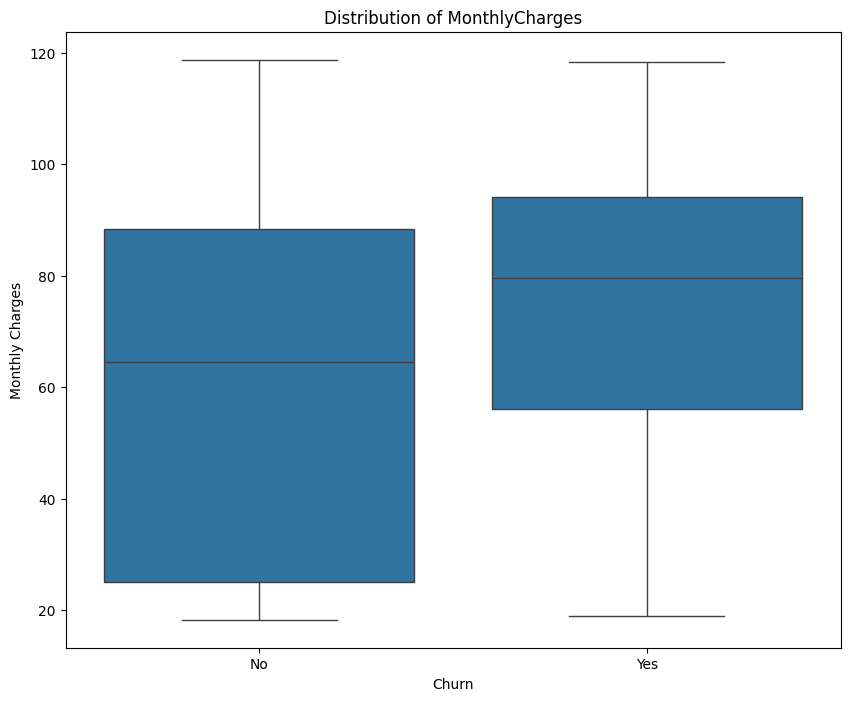

In [55]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges',)
plt.title("Distribution of MonthlyCharges")
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Lets see what services are they using who is paying higher Monthly charges

In [58]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Price_Level'],
      dtype='object')

In [71]:
(df['TechSupport'].value_counts(normalize=True) * 100).round(2)

TechSupport
No                     49.31
Yes                    29.02
No internet service    21.67
Name: proportion, dtype: float64

In [ ]:
(df['OnlineBackup'].value_counts(normalize=True) * 100).round(2)

OnlineBackup
No                     43.84
Yes                    34.49
No internet service    21.67
Name: proportion, dtype: float64

In [73]:
(df['StreamingTV'].value_counts(normalize=True) * 100).round(2)

StreamingTV
No                     39.90
Yes                    38.44
No internet service    21.67
Name: proportion, dtype: float64

In [79]:
# Lets check first Techsupported services
df.pivot_table(index="TechSupport", columns='Churn', values='customerID', aggfunc='count')

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [100]:
pivot_streamingTv = df.pivot_table(index="StreamingTV", columns='Churn', values='customerID', aggfunc='count')
pivot_streamingTv['ChurnRate'] = pivot_streamingTv['Yes'] / (pivot_streamingTv['Yes'] + pivot_streamingTv['No']) *100
(pivot_streamingTv).round(2) 

Churn,No,Yes,ChurnRate
StreamingTV,,,
No,1868,942,33.52
No internet service,1413,113,7.40
Yes,1893,814,30.07


In [101]:
pivot_security = df.pivot_table(index="OnlineSecurity", columns='Churn', values='customerID', aggfunc='count')
pivot_security['ChurnRate'] = pivot_security['Yes'] / (pivot_security['Yes'] + pivot_security['No']) * 100
pivot_security.round(2)

Churn,No,Yes,ChurnRate
OnlineSecurity,,,
No,2037,1461,41.77
No internet service,1413,113,7.40
Yes,1724,295,14.61


In [102]:
pivot_onlinebackup = df.pivot_table(index="OnlineBackup", columns='Churn', values='customerID', aggfunc='count')
pivot_onlinebackup['ChurnRate'] = pivot_onlinebackup['Yes'] / (pivot_onlinebackup["Yes"] + pivot_onlinebackup['No']) * 100
pivot_onlinebackup.round(2)

Churn,No,Yes,ChurnRate
OnlineBackup,,,
No,1855,1233,39.93
No internet service,1413,113,7.40
Yes,1906,523,21.53


In [105]:
pivot_streammovies = df.pivot_table(index="StreamingMovies", columns='Churn', values='customerID', aggfunc='count')
pivot_streammovies['ChurnRate'] = pivot_streammovies['Yes'] / (pivot_streammovies['Yes'] + pivot_streammovies['No']) * 100
pivot_streammovies.round(2)

Churn,No,Yes,ChurnRate
StreamingMovies,,,
No,1847,938,33.68
No internet service,1413,113,7.40
Yes,1914,818,29.94


Conclusion of Services: 
Onlinebackup and OnlineSecurity have more impact on churn peoples because those with subscriptions to these have less likely to churn the other services doesnt really that much matters

Check Contract types

In [108]:
df['Contract'].value_counts(normalize=True) * 100

Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: proportion, dtype: float64

In [111]:
# ChurnRate of each category
pivot_contract = df.pivot_table(index="Contract", columns='Churn', values='customerID', aggfunc='count')
pivot_contract['ChurnRate'] = pivot_contract['Yes'] / (pivot_contract['Yes'] + pivot_contract['No']) * 100
pivot_contract.round(2)

Churn,No,Yes,ChurnRate
Contract,,,
Month-to-month,2220,1655,42.71
One year,1307,166,11.27
Two year,1647,48,2.83


In [124]:
# Do people with longer cotracts have longer tenure?
df.pivot_table(index="Contract", values='tenure', aggfunc='mean').round(2)

,tenure
Contract,
Month-to-month,18.04
One year,42.04
Two year,56.74


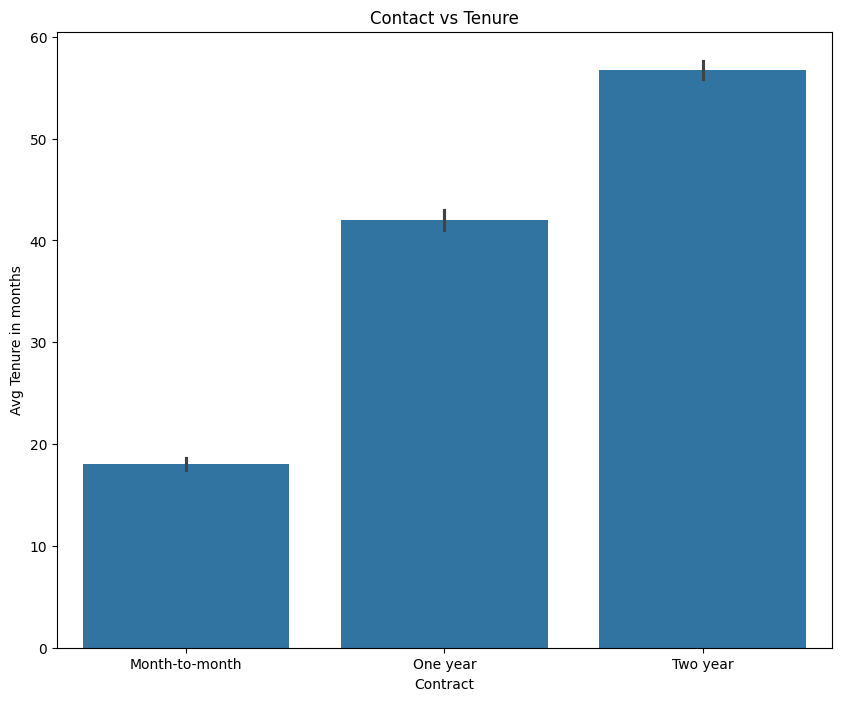

In [126]:
plt.figure(figsize=(10,8))
sns.barplot(x='Contract', y='tenure', data=df, estimator='mean')
plt.title("Contact vs Tenure")
plt.xlabel("Contract")
plt.ylabel("Avg Tenure in months")
plt.show()


Conclusion to Contract vs Tenure: Those with higher contract type have higher tenure

Lets Explore how payment methods effect churns

In [131]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Price_Level'],
      dtype='object')

In [132]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [135]:
df.groupby('PaymentMethod')['Churn'].value_counts()

PaymentMethod              Churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
Name: count, dtype: int64

In [138]:
df.pivot_table(index='PaymentMethod', values='Churn', aggfunc='count').round(2)

,Churn
PaymentMethod,
Bank transfer (automatic),1544
Credit card (automatic),1522
Electronic check,2365
Mailed check,1612


In [141]:
pivot_paymentmethod = df.pivot_table(index='PaymentMethod',columns='Churn',  values='customerID', aggfunc='count')
pivot_paymentmethod['ChurnRate'] = pivot_paymentmethod['Yes'] / (pivot_paymentmethod['Yes'] + pivot_paymentmethod['No']) * 100
pivot_paymentmethod.round(2)

Churn,No,Yes,ChurnRate
PaymentMethod,,,
Bank transfer (automatic),1286,258,16.71
Credit card (automatic),1290,232,15.24
Electronic check,1294,1071,45.29
Mailed check,1304,308,19.11


Conclusion of payment methods:
Those with electronic check are more likely to churn maybe because of forgetfullness or other reason.

Lets explore how paperless billing effect churns

In [ ]:
(df['PaperlessBilling'].value_counts(normalize=True) * 100).round(2) 

PaperlessBilling
Yes    59.22
No     40.78
Name: proportion, dtype: float64

In [147]:
pivot_paperless = df.pivot_table(index='PaperlessBilling',columns='Churn', values='customerID', aggfunc='count')
pivot_paperless['ChunRate'] = pivot_paperless['Yes'] / (pivot_paperless['Yes'] + pivot_paperless['No']) * 100
pivot_paperless.round(2)

Churn,No,Yes,ChunRate
PaperlessBilling,,,
No,2403,469,16.33
Yes,2771,1400,33.57


Conclusion of paperlessbliing: 
Thos with paperless billing are more liklely to churn which is connected to our previous finding of month to month contract types and electronic mail method
